# Compare energy requirements and resulting GWPs for different types of air separation units

In [1]:
# Fix sys path to root directory so locally defined packages can be found
import sys
sys.path.append('C:\\Users\\2270577A\\PycharmProjects\\PhD_LCA_TEA')
# sys.path  # show system path to see if import was successful

import pickle
import numpy as np
import matplotlib.pyplot as plt

from config import settings
from configs import gaussian
from functions.MonteCarloAnalysis import make_dist


In [2]:
# Method 1: Gabi Data

emissions_1 = settings.data.CO2_equivalents.resource_requirements.oxygen
equivalent_electricity_req_1 = emissions_1 / (1 / settings.data.densities["O2"]) / settings.data.CO2_equivalents.electricity.UK
print("Emissions from Method 1:", emissions_1, "kg CO2eq./kg O2")
print("Corresponding electricity consumption:", equivalent_electricity_req_1, "[kWh/ Nm3 O2]")


Emissions from Method 1: 0.0913 kg CO2eq./kg O2
Corresponding electricity consumption: 0.5688781613526116 [kWh/ Nm3 O2]


In [3]:
# Method 2: Data from Masaaki et al.

emissions_2_low = settings.data.energy_requirements.air_separation_unit.A["energy consumption low"] * (1 / settings.data.densities["O2"]) * settings.data.CO2_equivalents.electricity.UK

emissions_2_high = settings.data.energy_requirements.air_separation_unit.A["energy consumption high"] * (1 / settings.data.densities.O2) * settings.data.CO2_equivalents.electricity.UK

print("Lower emissions from Method 2:", emissions_2_low, "kg CO2eq./kg O2")
print("Higher emissions from Method 2:", emissions_2_high, "kg CO2eq./kg O2")


Lower emissions from Method 2: 0.05777687074829932 kg CO2eq./kg O2
Higher emissions from Method 2: 0.08024565381708239 kg CO2eq./kg O2


In [4]:
# Method 3: Data from "https://doi.org/10.1002/apj.354"

assumed_time_req = 1  # assume that ASU would need to run for 1 hr - nothing given in paper - bit weird that they quote it as power per tonne of O2 instead of energy per tonne of O2.
emissions_3 = (settings.data.power_requirements.air_separation_unit["power consumption"] / 1000) * assumed_time_req * settings.data.CO2_equivalents.electricity.UK

equivalent_electricity_req_3 = emissions_3 / (1 / settings.data.densities["O2"]) / settings.data.CO2_equivalents.electricity.UK

print("Emissions from Method 3:", emissions_3, "kg CO2eq./kg O2")
print("Corresponding electricity consumption:", equivalent_electricity_req_3, "[kWh/ Nm3 O2]")


Emissions from Method 3: 0.04777425 kg CO2eq./kg O2
Corresponding electricity consumption: 0.29767499999999997 [kWh/ Nm3 O2]


In [5]:
# Method 4: Data from Ozcan et al.

emissions_4 = settings.data.energy_requirements.air_separation_unit.B["energy consumption"] * (1 / settings.data.densities["O2"]) * settings.data.CO2_equivalents.electricity.UK

print("Emissions from Method 4:", emissions_4, "kg CO2eq./kg O2")


Emissions from Method 4: 0.049046143613000755 kg CO2eq./kg O2


In [6]:
# Method 5: Data from Alsultanny et al.

electricity_5 = settings.data.energy_requirements.air_separation_unit.C["energy consumption"]

print("Corresponding electricity consumptions:", electricity_5, "[kWh/ Nm3 O2]")




Corresponding electricity consumptions: [0.28, 0.464, 0.639, 0.631] [kWh/ Nm3 O2]


In [7]:
# Corresponding electricity requirements for oxygen generation

print("Corresponding electricity requirements for oxygen generation [kWh el./Nm3 O2]")
print("Req 1:", equivalent_electricity_req_1)
print("Req 2 low:", settings.data.energy_requirements.air_separation_unit.A["energy consumption low"])
print("Req 2 high:", settings.data.energy_requirements.air_separation_unit.A["energy consumption high"])
print("Req 3:", equivalent_electricity_req_3)
print("Req 4:", settings.data.energy_requirements.air_separation_unit.B["energy consumption"])
print("Req 5 a:", settings.data.energy_requirements.air_separation_unit.C["energy consumption"][0])
print("Req 5 b:", settings.data.energy_requirements.air_separation_unit.C["energy consumption"][1])
print("Req 5 c:", settings.data.energy_requirements.air_separation_unit.C["energy consumption"][2])
print("Req 5 d:", settings.data.energy_requirements.air_separation_unit.C["energy consumption"][3])



Corresponding electricity requirements for oxygen generation [kWh el./Nm3 O2]
Req 1: 0.5688781613526116
Req 2 low: 0.36
Req 2 high: 0.5
Req 3: 0.29767499999999997
Req 4: 0.3056
Req 5 a: 0.28
Req 5 b: 0.464
Req 5 c: 0.639
Req 5 d: 0.631


In [8]:
# Statistical analysis

# store data displayed above as array
data = [equivalent_electricity_req_1,
        settings.data.energy_requirements.air_separation_unit.A["energy consumption low"],
        settings.data.energy_requirements.air_separation_unit.A["energy consumption high"],
        equivalent_electricity_req_3,
        settings.data.energy_requirements.air_separation_unit.B["energy consumption"],
        settings.data.energy_requirements.air_separation_unit.C["energy consumption"][0],
        settings.data.energy_requirements.air_separation_unit.C["energy consumption"][1],
        settings.data.energy_requirements.air_separation_unit.C["energy consumption"][2],
        settings.data.energy_requirements.air_separation_unit.C["energy consumption"][3]
        ]

mean = np.mean(data)
std = np.std(data)

distribution = make_dist(gaussian(mean, std))

print("Data:", data)
print("Mean:", mean)
print("Std:", std)

Data: [0.5688781613526116, 0.36, 0.5, 0.29767499999999997, 0.3056, 0.28, 0.464, 0.639, 0.631]
Mean: 0.4495725734836235
Std: 0.1359585879068964


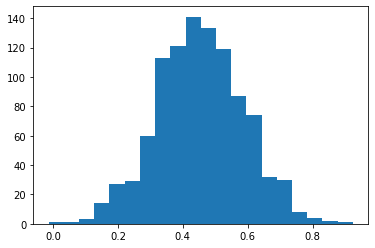

In [9]:
# Show distribution

plt.figure()
histogram = plt.hist(distribution,20)
plt.show()

In [10]:
# Store for later use

output_dict = {"Data": data,
               "Mean": mean,
               "Std": std,
               "Units": "[kWh el./Nm3 O2]"
               }

# Store Performance summary data frame of best performing model
with open(r"results\air_separation_unit_results", "wb") as f:
    pickle.dump(output_dict, f)

# Also save to data folder
with open(r"C:\Users\2270577A\PycharmProjects\PhD_LCA_TEA\data\air_separation_unit_results", "wb") as f:
    pickle.dump(output_dict, f)


# Summary
- All methods produce similar numbers and are in the same order of magnitude.
- Numbers from GaBi are most pessimistic - close to the lower efficiency of Method 2.
- Most conservative values (Method 1) are used in analysis.